

# Project: Investigate a Dataset - [No-show appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


### Dataset Description 

> **Project Overview**:
In this project, I will analyze the dataset of [**No-show appointments**], and then communicate my findings about it. This dataset collects information from more than 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

> Such dataset is part of the ALX-T Data Analyst Nano Degree (DAND) track from Udacity online learning platform [URL](https://www.alxafrica.com/programme_post/data-analyst/). The reader can find the source of such dataset on Kaggle website from this [URL](https://www.kaggle.com/datasets/joniarroba/noshowappointments).

> The project was carried out through the Project Workspace of Udacity online learning platform.
<br> The project was carried by the future data analyst: 
<br><code>    </code> **Mohamed Salah**, 
<br><code>      </code> Post-doc. Research Fellow, Kyushu University, JAPAN
<br><code>      </code> Assis. Prof., Minia University, EGYPT
<br><code>      </code> Date: Tuesday, Aug. 9th, 2022
<br><code>      </code> E-mail:  m.salah@mu.edu.eg

> In order to read more about the available datasets. A reader can visit this [URL](https://docs.google.com/document/d/e/2PACX-1vTlVmknRRnfy_4eTrjw5hYGaiQim5ctr9naaRd4V9du2B5bxpd8FEH3KtDgp8qVekw7Cj1GLk1IXdZi/pub?embedded=True).

> A list of softwares and associated packages/libraries used to develop this project:
* **Anaconda** the World's Most Popular Data Science Platform
* **Jupyter Notebook** the Data science integrated development environment (IDE)
* **NumPy** library for scientific computing in Python 
     - The current version is 1.23.0
* **pandas** library for data cleaning and analysis in Python
     - The current version is 1.4.3
* **Matplotlib** library for comprehensive visualizations in Python
     - The current version is 3.5.2
* **seaborn** library for statistical data visualization in Python
     - The current version is 0.11.2

> List all column names in the dataset and thier significance.

| Column Name | Brief Description |
| --- | --- |
| PatientId | Patient identification Number |
| AppointmentID | Appointment identification Number |
| Gender | Patient gender Male or Female |
| ScheduledDay | The date and time of the registered appointment. |
| AppointmentDay | The date and time of the appointment to visit the clinic |
| Age | Patient age |
| Neighbourhood | The location of the hospital, in which the appointment takes place |
| Scholarship | Whether or not the patient is enrolled in Brasilian welfare program |
| Hipertension | High blood pressure in adults - The correct spelling is **Hypertension** |
| Diabetes | Patients with cardiovascular disease |
| Alcoholism | Alcohol use disorder - It involves heavy or frequent alcohol drinking |
| Handcap | To indentify Patients with Disabilities - The correct spelling is **Handicap** |
| SMS_received | ‘0’ if the patient doesn't receive a message and ‘1’ if he received a message |
| No-show | ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up | 


### Question(s) for Analysis
>**Tip**: Clearly state one or more questions that you plan on exploring over the course of the report. You will address these questions in the **data analysis** and **conclusion** sections. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> **Tip**: Once you start coding, use NumPy arrays, Pandas Series, and DataFrames where appropriate rather than Python lists and dictionaries. Also, **use good coding practices**, such as, define and use functions to avoid repetitive code. Use appropriate comments within the code cells, explanation in the mark-down cells, and meaningful variable names. 

In [1]:
# Load important packages that will be used in the analysis
# inline with the notebook.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Upgrade pandas to use dataframe.explode() function. 
# !pip install --upgrade pandas==0.25.0  # This is a very old version of pandas library
!pip install --upgrade pandas==1.4.3     # This is the current version of pandas library that is updated on Date: Jun 23, 2022

<a id='wrangling'></a>
## Data Wrangling

> In this section of the report, I will load in the dataset, check for cleanliness, and then trim and clean my dataset for analysis.


### Data Importing and Description

In [2]:
# Load your data and print out a few lines.
appoints_df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

# In this case we use the *.head() commnad to show the first 5 rows of the dataset.
# You can specifiy the number of rows to be displayed by entering the number between the parentheses e.g., *.head(10)
#print(appoints_df.head())
appoints_df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
appoints_df.shape

(110527, 14)

**From this results, it can be seen that the dataset considered in this analysis consists of 14 columns and 110527 rows.**

In [4]:
# Inspect data types and look for missing values or possibly typo errors
appoints_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


* This command helps us to check the overall characteristic of the dataset by identifying dimensions of dataset, missing values, typo errors, and inappropiate datatypes of variables.
* The above results confirm the number of columns and rows in the dataset which are 14 and 110527, respectively as shown.
* One important notice about the number of rows for each column, it is the same which means that **there are no missing or null values in this dataset**.
* The results also show the datatypes of each column which include (float64, int64, object or string).
* We observed that hyphen in column of **"No-show"** must be changed to underscore symbol to be **"No_show"**
* Some typo errors or `misspellings` are existing in some attributes such as **"Hipertension"** and **"Handcap"**. The correct spellings are **"Hypertension"** and **"Handicap"**, respectively.

In [5]:
# Some statistical information about the considered dataset [No-show appointments]
appoints_df.describe().round(5)

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.00000,110527.00000,110527.00000,110527.00000,110527.00000,110527.00000,110527.00000
mean,1.474963e+14,5.675305e+06,37.08887,0.09827,0.19725,0.07186,0.03040,0.02225,0.32103
std,2.560949e+14,7.129575e+04,23.11020,0.29767,0.39792,0.25827,0.17169,0.16154,0.46687
min,3.920000e+04,5.030230e+06,-1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,4.172615e+12,5.640286e+06,18.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
50%,3.173180e+13,5.680573e+06,37.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
75%,9.439170e+13,5.725524e+06,55.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000
max,9.999820e+14,5.790484e+06,115.00000,1.00000,1.00000,1.00000,1.00000,4.00000,1.00000


In [6]:
appoints_df['Age'].min(), appoints_df['Age'].max()

(-1, 115)

**Even thought the "PatientId" and "AppointmentID" have numerical values, the values are meaningless in the analysis and therefore such columns can be discarded without any effect on the analysis process.**


### Data Cleaning
> In this stage, a deep insight will be given to the information in the dataset comprising the check of correct spelling of attributes, the check of correct datatype of variables, feature selection to drop the unnecessary attributes in the dataset, which off course will not affect the analysis process.
 

In [7]:
# To confirm that there are no null values in this dataset, we can apply
pd.isna(appoints_df).sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [8]:
# Another method to check for null values in each column in the dataset
appoints_df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [9]:
# To obtain the totla number of null values in the entire dataset
appoints_df.isnull().sum().sum()

0

In [10]:
# List the columns names as a reminder of the typset of each attribute
list(appoints_df.columns)

['PatientId',
 'AppointmentID',
 'Gender',
 'ScheduledDay',
 'AppointmentDay',
 'Age',
 'Neighbourhood',
 'Scholarship',
 'Hipertension',
 'Diabetes',
 'Alcoholism',
 'Handcap',
 'SMS_received',
 'No-show']

In [11]:
# According to the previous discussion, we have to rename some attributes as follows:
renaimed_cols = {"PatientId":"PatientID", "Hipertension":"Hypertension", "Handcap":"Handicap", "No-show":"Attendance"}
appoints_df.rename(columns=renaimed_cols, inplace=True)

# checking that changes took place
appoints_df.head()

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Attendance
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


> **Now we can observe the changes in the typesetting of the attributes.**

In [12]:
# let us check any duplicates in the dataset 
# I used *.sum() method to obtain the summation of the duplications
appoints_df.duplicated().sum()

0

> **It can be seen that there is no duplications in the datasets. If there are any duplicates we apply the next command.**

In [13]:
# The duplicates in the dataset must be removed/discarded
appoints_df.drop_duplicates().tail()

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Attendance
110522,2.572130e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596270e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557660e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213490e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775120e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


In [14]:
# Identifying the unique values of patients 
print(appoints_df['PatientID'].nunique())

61744


> **The above result show that there are 61744 patients out of 110527 patients have more than one appointment at the same clinic.**

In [15]:
sum(appoints_df['AppointmentID'].duplicated())

0

> **Since there are no duplicates in the AppointmentID, this means that each appointment has a unique ID.**

In [16]:
# To check the unique values of the Age attribute
np.sort(appoints_df['Age'].unique())

array([ -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
        12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,
        25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
        38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
        51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
        64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
        77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
        90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 102, 115],
      dtype=int64)

> **From the above results, it can be seen that there is a value of "-1" in the Age column, which isn't correct.**

In [17]:
# To identify how many number of patients in the dataset have inapproprite age such as "-1"
appoints_df[appoints_df['Age'] < 0]

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Attendance
99832,4.659430e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


> **Therefor only one invalid patient age of "-1", which if it is dropped will not affect the results.**

In [18]:
# Dropping the incorrect Age row
appoints_df.drop(appoints_df[appoints_df['Age'] < 0].index, inplace=True)
appoints_df.describe()

,PatientID,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.920000e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172538e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173180e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438960e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999820e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


> **Now we can observe that the minimum age of patients is "0", which is acceptable.**

In [19]:
X1 = appoints_df['Age'].min()
X2 = appoints_df['Age'].max()
X3 = appoints_df['Age'].mean()
X4 = appoints_df['Age'].median()
X5 = appoints_df['Age'].mode()

print(f"The youngest patient has: {X1} years old")
print(f"The oldest patient has: {X2} years old")
print(f"The average age of patients is: {X3} years old")
print(f"The median age of patients is: {X4} years old")
print(f"The most frequent age of patients is: {X5} years old")


The youngest patient has: 0 years old
The oldest patient has: 115 years old
The average age of patients is: 37.089218826339504 years old
The median age of patients is: 37.0 years old
The most frequent age of patients is: 0    0
Name: Age, dtype: int64 years old


In [20]:
# To check the uniqueness of the Age again
np.sort(appoints_df['Age'].unique())

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 102, 115],
      dtype=int64)

In [21]:
# After removing the incorrect Age value, We can check the dimensions of the updated dataset.
appoints_df.shape

(110526, 14)

> **We can observe that the number of rows decreased from 110527 to 110526 due to the removal of the incorrect row.**

In [22]:
# Convert "AppointmentDay" & "ScheduleDay" datatype into datetime 
appoints_df['AppointmentDay'] = pd.to_datetime(appoints_df['AppointmentDay'])
appoints_df['ScheduledDay'] = pd.to_datetime(appoints_df['ScheduledDay'])

appoints_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientID       110526 non-null  float64            
 1   AppointmentID   110526 non-null  int64              
 2   Gender          110526 non-null  object             
 3   ScheduledDay    110526 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110526 non-null  datetime64[ns, UTC]
 5   Age             110526 non-null  int64              
 6   Neighbourhood   110526 non-null  object             
 7   Scholarship     110526 non-null  int64              
 8   Hypertension    110526 non-null  int64              
 9   Diabetes        110526 non-null  int64              
 10  Alcoholism      110526 non-null  int64              
 11  Handicap        110526 non-null  int64              
 12  SMS_received    110526 non-null  int64              
 13  Attendance    

In [23]:
# ‘No’ if the patient showed up to his appointment which means that the patient attend to the clinic in the allocated time
# and ‘Yes’ if they did not show up to his appointment and doesn't attend to the clinic
appoints_df['Attendance'] = appoints_df['Attendance'].replace({'No' : 1, 'Yes' : 0})
appoints_df.head()

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Attendance
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,5.589980e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2,4.262960e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,1
3,8.679510e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,8.841190e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,1


In [24]:
print(appoints_df['Handicap'].unique())

[0 1 2 3 4]


> **From the above results, it can be seen that the handicapped patients were not only classified according to the disabilities, but also there may be a degree for such disability.**

In [25]:
appoints_df['Handicap'].value_counts()

0    108285
1      2042
2       183
3        13
4         3
Name: Handicap, dtype: int64

In [26]:
# Changing PatientID and AppointmentID to an object instead of being float or integer
appoints_df['PatientID'] = appoints_df['PatientID'].astype('object')
appoints_df['AppointmentID'] = appoints_df['AppointmentID'].astype('object')

In [27]:
# Inspect data types and look for missing values or possibly typo errors
appoints_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientID       110526 non-null  object             
 1   AppointmentID   110526 non-null  object             
 2   Gender          110526 non-null  object             
 3   ScheduledDay    110526 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110526 non-null  datetime64[ns, UTC]
 5   Age             110526 non-null  int64              
 6   Neighbourhood   110526 non-null  object             
 7   Scholarship     110526 non-null  int64              
 8   Hypertension    110526 non-null  int64              
 9   Diabetes        110526 non-null  int64              
 10  Alcoholism      110526 non-null  int64              
 11  Handicap        110526 non-null  int64              
 12  SMS_received    110526 non-null  int64              
 13  Attendance    

In [28]:
# Discard the columns that we notice that useless in the analysis
appoints_df.drop(['PatientID','AppointmentID'] , axis=1 ,inplace=True)
appoints_df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Attendance
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,1
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,1


In [29]:
appoints_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   Gender          110526 non-null  object             
 1   ScheduledDay    110526 non-null  datetime64[ns, UTC]
 2   AppointmentDay  110526 non-null  datetime64[ns, UTC]
 3   Age             110526 non-null  int64              
 4   Neighbourhood   110526 non-null  object             
 5   Scholarship     110526 non-null  int64              
 6   Hypertension    110526 non-null  int64              
 7   Diabetes        110526 non-null  int64              
 8   Alcoholism      110526 non-null  int64              
 9   Handicap        110526 non-null  int64              
 10  SMS_received    110526 non-null  int64              
 11  Attendance      110526 non-null  int64              
dtypes: datetime64[ns, UTC](2), int64(8), object(2)
memory usage: 11.0+ MB


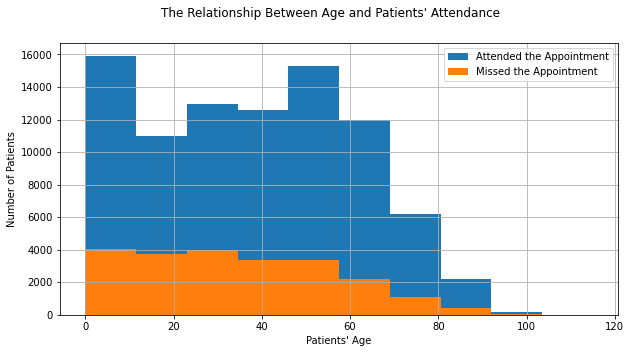

In [30]:
plt.figure(figsize = (10,5))
Attended_appoint = appoints_df['Attendance'] == 1
Missed_appoint = appoints_df['Attendance'] == 0
appoints_df['Age'][Attended_appoint].hist(label = "Attended the Appointment")
appoints_df['Age'][Missed_appoint].hist(label = "Missed the Appointment")
plt.suptitle("The Relationship Between Age and Patients' Attendance")
plt.xlabel("Patients' Age")
plt.ylabel("Number of Patients")
plt.legend()

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


## Describe the generals trend in the avaiable attributes.

array([[<AxesSubplot:title={'center':'ScheduledDay'}>,
        <AxesSubplot:title={'center':'AppointmentDay'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'Scholarship'}>,
        <AxesSubplot:title={'center':'Hypertension'}>,
        <AxesSubplot:title={'center':'Diabetes'}>],
       [<AxesSubplot:title={'center':'Alcoholism'}>,
        <AxesSubplot:title={'center':'Handicap'}>,
        <AxesSubplot:title={'center':'SMS_received'}>],
       [<AxesSubplot:title={'center':'Attendance'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

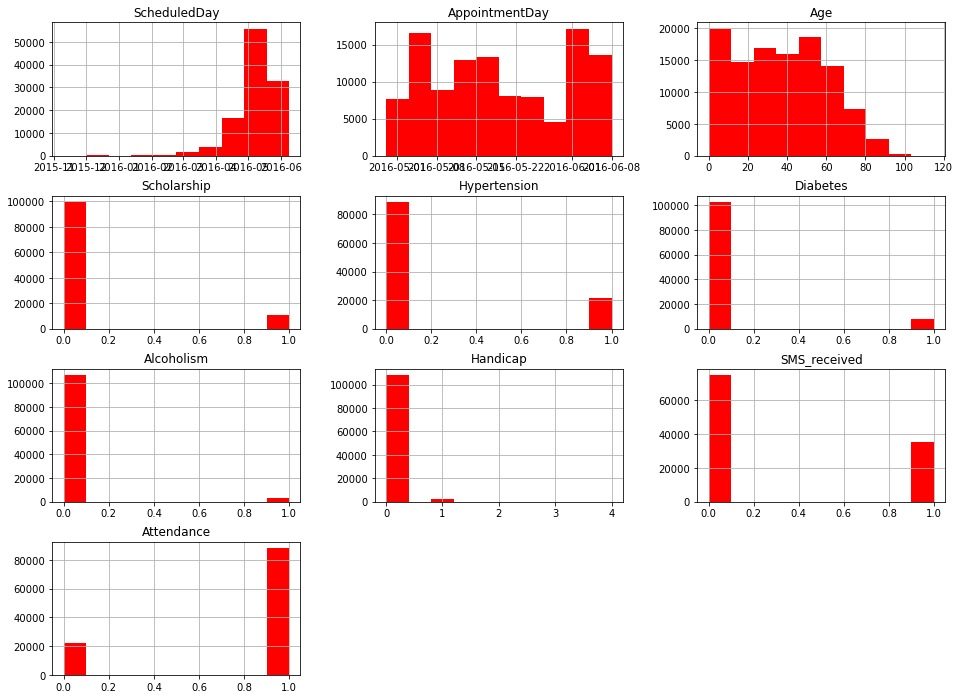

In [31]:
# Histograms of all attriutes in the dataset
appoints_df.hist(figsize= (16, 12), color = 'red')

From the above figures, it can be seen that
1. The patients' ages has a right skewed distribution, in which the majority of patients are under 60 years old. 
2. The majority of patients don't drink alcohol
3. Most of the patients atteneded thier specified appointment
4. The majority of the patients don't suffer from Diabetes or disability

## What is the relationship between the patients' age and the commitment to attend the prespecified appointment?

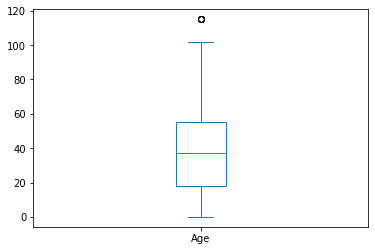

In [32]:
# Firstly, I want to check the patients' ages have outliers or not
appoints_df['Age'].plot.box();

> **From this figure it can be seen that the Age attribute ahs an outlier, which may be the value of "115"**

<AxesSubplot:xlabel='Attendance', ylabel='Age'>

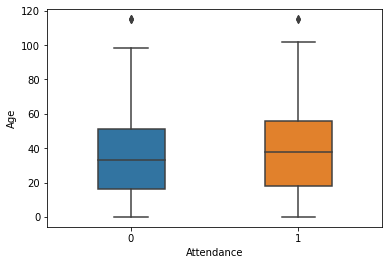

In [33]:
sns.boxplot(y=appoints_df["Age"], x=appoints_df["Attendance"], width = 0.4)

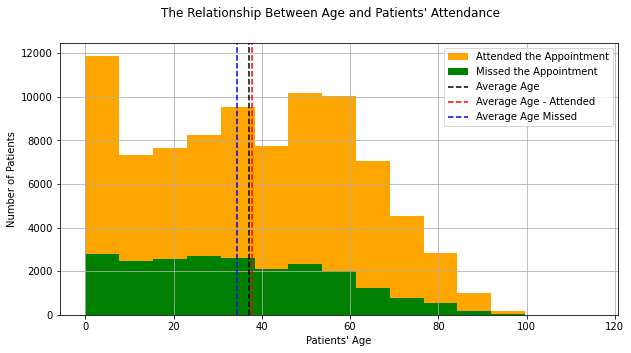

In [34]:
plt.figure(figsize = (10,5))
Attended_appoint = appoints_df['Attendance'] == 1
Missed_appoint = appoints_df['Attendance'] == 0
appoints_df['Age'][Attended_appoint].hist(bins = 15, alpha = 1, color = 'orange', label = "Attended the Appointment")
appoints_df['Age'][Missed_appoint].hist(bins = 15, alpha = 1, color = 'green', label = "Missed the Appointment")
plt.suptitle("The Relationship Between Age and Patients' Attendance")
plt.xlabel("Patients' Age")
plt.ylabel("Number of Patients")
plt.axvline(appoints_df['Age'].mean(), color='k', linestyle='dashed', label = "Average Age")
plt.axvline(appoints_df['Age'][Attended_appoint].mean(), color='red', linestyle='dashed', label = "Average Age - Attended")
plt.axvline(appoints_df['Age'][Missed_appoint].mean(), color='blue', linestyle='dashed', label = "Average Age Missed")
plt.legend()


**From the above figure, it can be seen that the majority of the patients attend thier appintements. Patients in thier fifties and preschool students are the most conservative in attending appointments on time compared to old adults.**

In [35]:
# To determine the number of patients that attended or missed thier appointments
appoints_df["Attendance"].value_counts()

1    88207
0    22319
Name: Attendance, dtype: int64

Text(0.5, 0, 'Attendance Status')

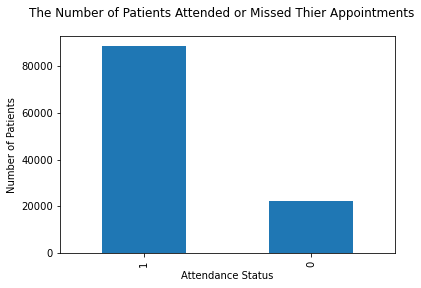

In [36]:
# To determine the number of patients that attended or missed thier appointments
appoints_df["Attendance"].value_counts().plot(kind='bar')
plt.suptitle('The Number of Patients Attended or Missed Thier Appointments')
plt.ylabel('Number of Patients')
plt.xlabel('Attendance Status')

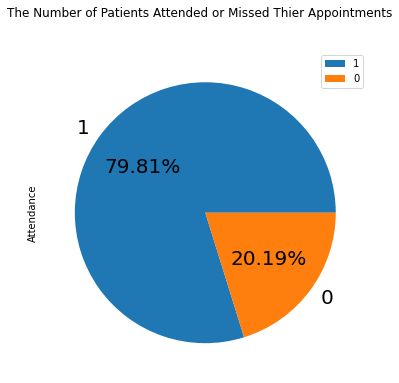

In [37]:
# To determine the number of patients that attended or missed thier appointments
attend = appoints_df["Attendance"].value_counts()
attend.plot.pie(figsize = (6,6), autopct = "%1.2f%%", fontsize = 20)
plt.suptitle('The Number of Patients Attended or Missed Thier Appointments')
plt.legend()

In [38]:
def gender_attend(temp1, temp2, temp3, title):
    temp = sns.countplot(x=temp1, hue=temp2, data=temp3)
    temp.set_title(title)

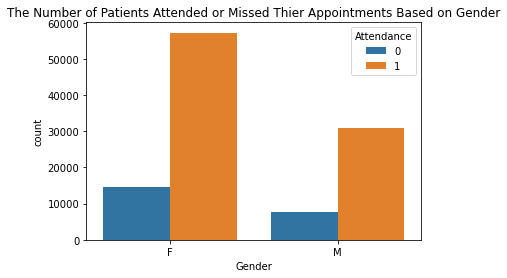

In [39]:
gender_attend(appoints_df['Gender'], appoints_df['Attendance'], appoints_df, "The Number of Patients Attended or Missed Thier Appointments Based on Gender")

Text(0.5, 1.0, 'The Number of Patients Attended or Missed Thier Appointments Based on Health Insurrance Coverage')

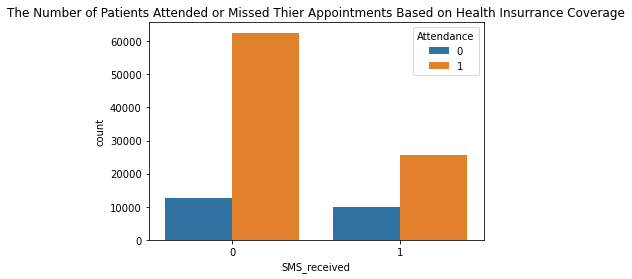

In [40]:
temp = sns.countplot(x=appoints_df['SMS_received'], hue=appoints_df['Attendance'], data=appoints_df)
temp.set_title("The Number of Patients Attended or Missed Thier Appointments Based on Health Insurrance Coverage")

Text(0.5, 1.0, 'The Number of Patients Attended or Missed Thier Appointments Based on Health Insurrance Coverage')

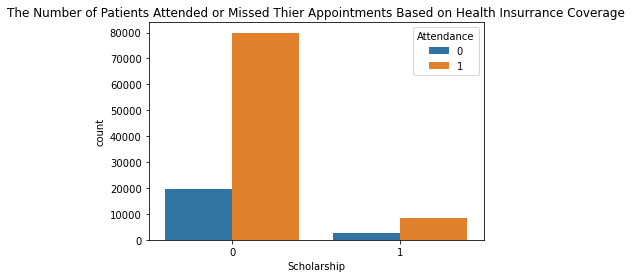

In [41]:
temp = sns.countplot(x=appoints_df['Scholarship'], hue=appoints_df['Attendance'], data=appoints_df)
temp.set_title("The Number of Patients Attended or Missed Thier Appointments Based on Health Insurrance Coverage")

<a id='conclusions'></a>

## Conclusions

**Salient observations are listed below**. From the above results it can be seen that:-

1. The average age of patients is around 37 years old, which aslo represents 50% of the patints' age in the dataset.

2. The youngest patient in the dataset has -1 year, which may be an error since there is no age in negative. It is already dropped/discarded from the dataset during the cleaning stage.

3. The oldest patient in the dataset has 115 years old, which then identified as an outlier during the analysis.

4. Only about 10% of the patients are covered by the Brasilian welfare program `Bolsa Família`, which mainly affect the attdendance of the patients to their appointments.

5. Around one-fifth (19.7%) of the patients suffer from Hypertension, which represents the highest percentage compared to other diseases of Diabetes (7.1%) and Handicapped (2.2%).

6. Around one-third (32.1%) of patients recieved an SMS reminder for thier next visit to the clinic.

7. The majority of the patients attend thier appintements. Patients in thier fifties and preschool students are the most conservative in attending appointments on time compared to old adults.

8. It can be seen that the handicapped patients were not only classified according to the disabilities, but also there may be a degree for such disability since there are five categories in this attribute.



## Limitations 

1. Most of the patients that missed thier appointments aren't convered by the Brazilian Welfare Program (Health Inssurance).

2. Regarding the range of patients' ages, the majority of patients that responded to thier appointment comprises very young patients ranging from 0 to around 8 years old. Howvever. We can't be sure about infants that they can follow-up the specified date of appointment or not. It may be related to thier parents, which isn't clearly identified in the dataset.

3. The dataset doesn't specify the type of appointment. For instance, this is the first time to visit the clinic or the second time. Since this may affect the priority of taking an appointment.


In [42]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1